In [12]:
import numpy as nd
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
dataset=pd.read_csv("/content/UberDataset.csv")
dataset.head()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [14]:
dataset.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


In [15]:
dataset["PURPOSE"].fillna("NOPURPOSE",inplace=True)
dataset["END_DATE"].fillna("N/A",inplace=True)
dataset["START"].fillna("NO",inplace=True)
dataset["STOP"].fillna("NO",inplace=True)
dataset["CATEGORY"].fillna("NAN",inplace=True)

<ipython-input-15-a366d2ed44c1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["PURPOSE"].fillna("NOPURPOSE",inplace=True)
<ipython-input-15-a366d2ed44c1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [16]:
dataset.isnull().sum()
dataset.dtypes

,0
START_DATE,object
END_DATE,object
CATEGORY,object
START,object
STOP,object
MILES,float64
PURPOSE,object


In [17]:
dataset.duplicated().sum()
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [18]:
#Standaradlize Data
dataset["CATEGORY"] = dataset["CATEGORY"].str.lower()
dataset["PURPOSE"] = dataset["PURPOSE"].str.lower()
dataset["CATEGORY"] = dataset["CATEGORY"].str.strip()
dataset["PURPOSE"] = dataset["PURPOSE"].str.strip()

In [19]:
#Saved Cleaned file
dataset.to_csv("/content/cleaned_data.csv", index=False)

In [20]:
#Import cleaned data file
df=pd.read_csv("/content/cleaned_data.csv")
df.head()
df.describe()

,MILES
count,1155.000000
mean,21.125108
std,359.454497
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


from matplotlib import pyplot as plt
_df_0['MILES'].plot(kind='hist', bins=20, title='MILES')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MILES'].plot(kind='line', figsize=(8, 4), title='MILES')
plt.gca().spines[['top', 'right']].set_visible(False)

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns


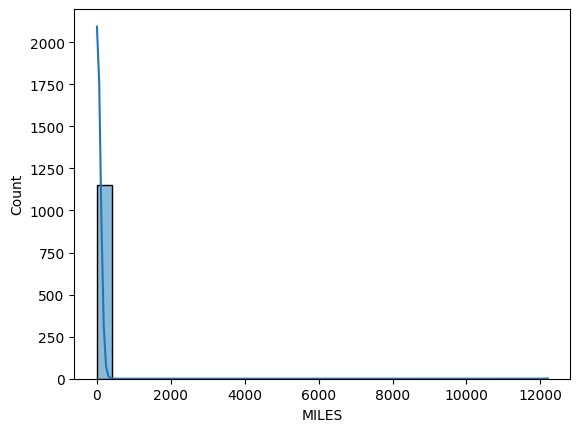

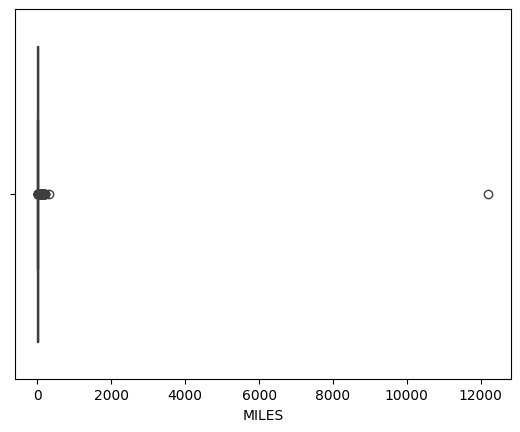

In [23]:
sb.histplot(df["MILES"], bins=30, kde=True)
plt.show()
sb.boxplot(x=df["MILES"])
plt.show()

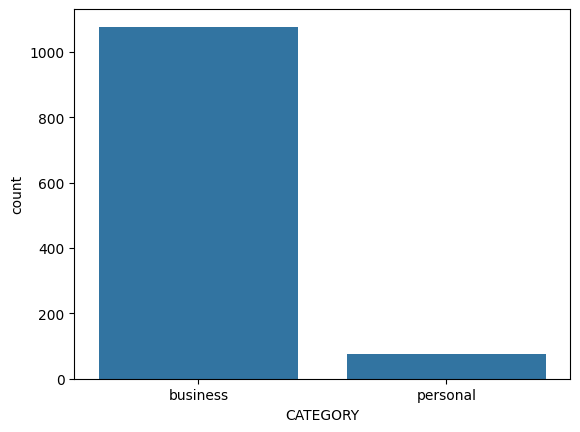

In [24]:
sns.countplot(x=df["CATEGORY"])
plt.show()

<Axes: xlabel='WEEKDAY'>

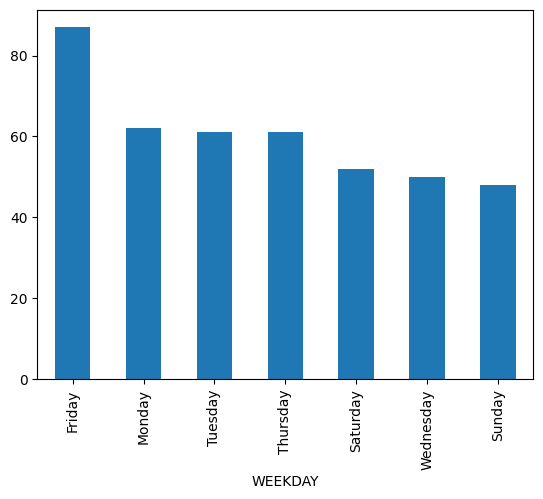

In [25]:
df["START_DATE"] = pd.to_datetime(df["START_DATE"], format="%m-%d-%Y %H:%M",errors="coerce")
df["END_DATE"] = pd.to_datetime(df["END_DATE"], format="%m-%d-%Y %H:%M", errors="coerce")
df["MONTH"] = df["START_DATE"].dt.month
df["MONTH"].value_counts().sort_index().plot(kind="bar")
df["WEEKDAY"] = df["START_DATE"].dt.day_name()
df["WEEKDAY"].value_counts().plot(kind="bar")


<ipython-input-26-dd32b3a545f1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=busiest_months.index, y=busiest_months.values, palette="viridis")


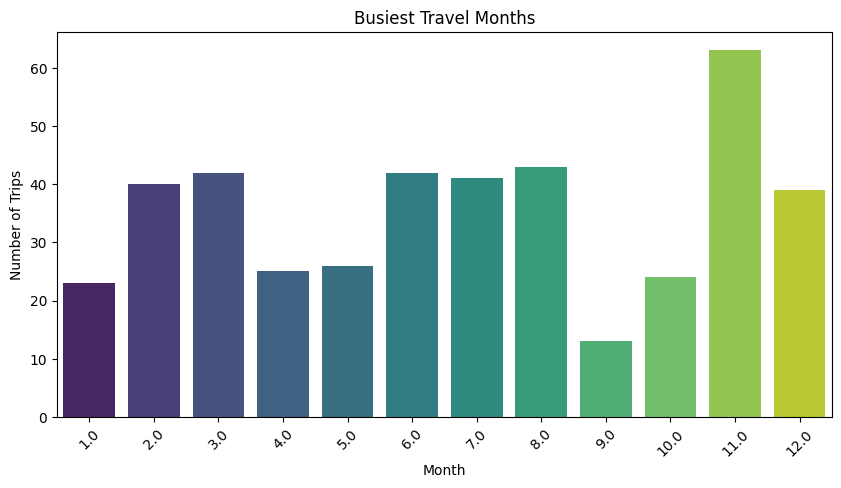

<ipython-input-26-dd32b3a545f1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=busiest_days.index, y=busiest_days.values, palette="coolwarm")


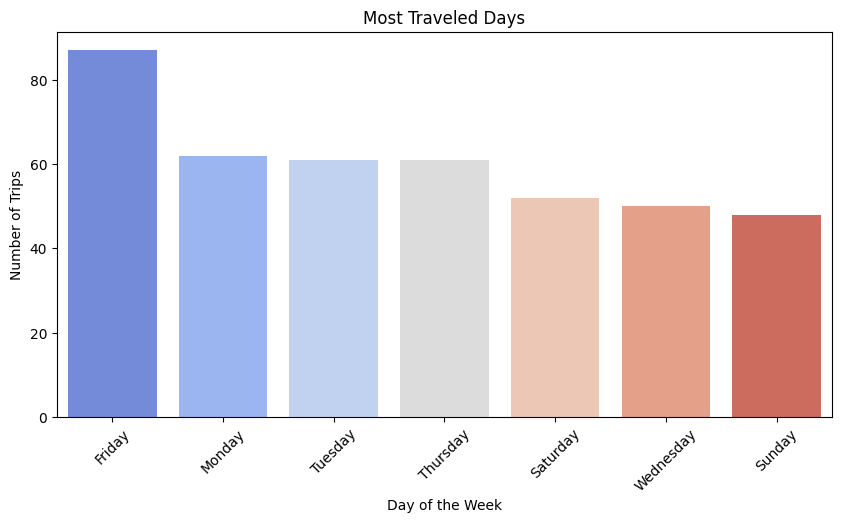

<ipython-input-26-dd32b3a545f1>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_purposes.index, y=common_purposes.values, palette="magma")


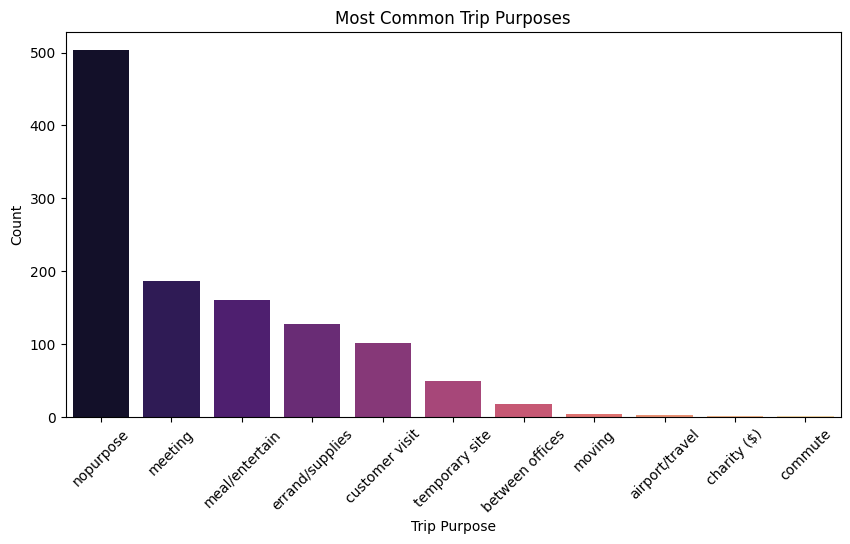

Busiest Travel Months:
 MONTH
11.0    63
8.0     43
3.0     42
6.0     42
7.0     41
2.0     40
12.0    39
5.0     26
4.0     25
10.0    24
1.0     23
9.0     13
Name: count, dtype: int64

Most Traveled Days:
 WEEKDAY
Friday       87
Monday       62
Tuesday      61
Thursday     61
Saturday     52
Wednesday    50
Sunday       48
Name: count, dtype: int64

Most Common Trip Purposes:
 PURPOSE
nopurpose          503
meeting            186
meal/entertain     160
errand/supplies    128
customer visit     101
temporary site      50
between offices     18
moving               4
airport/travel       3
charity ($)          1
commute              1
Name: count, dtype: int64

Average Trip Distance: 21.125108225108228

Most Frequently Visited Start Locations:
 START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place      

In [26]:
busiest_months = df["MONTH"].value_counts()

# 2. Most traveled days
busiest_days = df["WEEKDAY"].value_counts()

# 3. Most common trip purposes
common_purposes = df["PURPOSE"].value_counts()

# 4. Average trip distance
average_distance = df["MILES"].mean()

# 5. Most frequently visited locations (start & stop)
top_start_locations = df["START"].value_counts().head(10)
top_stop_locations = df["STOP"].value_counts().head(10)

# Plot busiest months
plt.figure(figsize=(10, 5))
sns.barplot(x=busiest_months.index, y=busiest_months.values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Busiest Travel Months")
plt.xticks(rotation=45)
plt.show()

# Plot busiest days
plt.figure(figsize=(10, 5))
sns.barplot(x=busiest_days.index, y=busiest_days.values, palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.title("Most Traveled Days")
plt.xticks(rotation=45)
plt.show()

# Plot common trip purposes
plt.figure(figsize=(10, 5))
sns.barplot(x=common_purposes.index, y=common_purposes.values, palette="magma")
plt.xlabel("Trip Purpose")
plt.ylabel("Count")
plt.title("Most Common Trip Purposes")
plt.xticks(rotation=45)
plt.show()

# Print key insights
print("Busiest Travel Months:\n", busiest_months)
print("\nMost Traveled Days:\n", busiest_days)
print("\nMost Common Trip Purposes:\n", common_purposes)
print("\nAverage Trip Distance:", average_distance)
print("\nMost Frequently Visited Start Locations:\n", top_start_locations)
print("\nMost Frequently Visited Stop Locations:\n", top_stop_locations)